In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Directory where images are stored
base_dir = 'food'  # Update path ke dataset lokal
image_size = (224, 224)
batch_size = 32

# Mempersiapkan data dengan augmentasi
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Membuat generator untuk pelatihan, validasi, dan pengujian
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Load MobileNetV2 model with weights pre-trained on ImageNet
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

# Add custom top layers
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

# Save the trained model
model.save('mobilenetv2_food_classification_finalmodels.keras')

Found 30400 images belonging to 76 classes.
Found 7600 images belonging to 76 classes.
Epoch 1/100


c:\Users\Faqih SA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


950/950 ━━━━━━━━━━━━━━━━━━━━ 693s 723ms/step - accuracy: 0.2656 - loss: 3.0183 - val_accuracy: 0.4967 - val_loss: 1.9096
Epoch 2/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 685s 719ms/step - accuracy: 0.5016 - loss: 1.8598 - val_accuracy: 0.5086 - val_loss: 1.8499
Epoch 3/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 685s 719ms/step - accuracy: 0.5554 - loss: 1.6737 - val_accuracy: 0.5387 - val_loss: 1.7475
Epoch 4/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 685s 719ms/step - accuracy: 0.5751 - loss: 1.5812 - val_accuracy: 0.5416 - val_loss: 1.7612
Epoch 5/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 687s 721ms/step - accuracy: 0.5879 - loss: 1.5422 - val_accuracy: 0.5461 - val_loss: 1.7361
Epoch 6/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 746s 783ms/step - accuracy: 0.5980 - loss: 1.4878 - val_accuracy: 0.5579 - val_loss: 1.7002
Epoch 7/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 807s 846ms/step - accuracy: 0.6078 - loss: 1.4372 - val_accuracy: 0.5638 - val_loss: 1.6745
Epoch 8/100
950/950 ━━━━━━━━━━━━━━━━━━━━ 684s 718ms/step - accuracy: 0.6190 - los

In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,828,838 (10.79 MB)

 Trainable params: 190,284 (743.30 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 380,570 (1.45 MB)

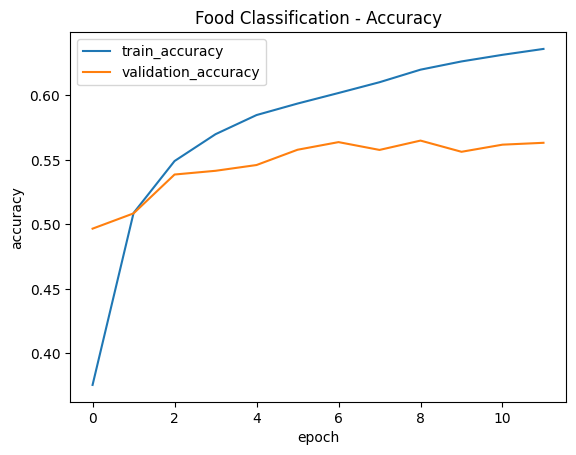

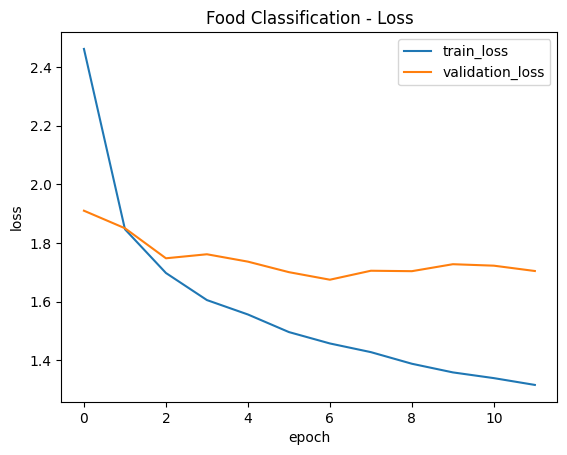

In [4]:
def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

# Memvisualisasikan grafik akurasi dan loss dari history pelatihan model
plot_accuracy(history, 'Food Classification - Accuracy')
plot_loss(history, 'Food Classification - Loss')

In [5]:
# Langkah 1: Menggunakan data validasi penuh untuk evaluasi
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    shuffle=False  # Jangan acak agar urutan data tetap untuk evaluasi
)

# Memuat model yang sudah disimpan
model = load_model('mobilenetv2_food_classification_finalmodels.keras')

# Melakukan prediksi pada seluruh data validasi
val_steps = validation_generator.samples // batch_size + 1
predictions = model.predict(validation_generator, steps=val_steps)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

# Cek jumlah kelas pada data validasi
num_classes_val = len(np.unique(true_labels))
print(f"Jumlah kelas pada data validasi: {num_classes_val}")

# Mengambil nama kelas dari generator
class_names = list(validation_generator.class_indices.keys())
print(f"Jumlah kelas yang terbaca oleh validation_generator: {len(class_names)}")

# hitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Akurasi model: {accuracy * 100:.2f}%')

# Menghitung classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Menampilkan seluruh baris pada dataframe
pd.set_option('display.max_rows', None)

# Menampilkan classification report dalam bentuk tabel
print("Classification Report:")
print(df_report)

Found 7600 images belonging to 76 classes.
238/238 ━━━━━━━━━━━━━━━━━━━━ 138s 574ms/step
Jumlah kelas pada data validasi: 76
Jumlah kelas yang terbaca oleh validation_generator: 76
Akurasi model: 55.97%
Classification Report:
                      precision    recall  f1-score      support
baby_back_ribs         0.483146  0.430000  0.455026   100.000000
baklava                0.496350  0.680000  0.573840   100.000000
beef_tartare           0.520408  0.510000  0.515152   100.000000
beet_salad             0.528571  0.370000  0.435294   100.000000
beignet                0.666667  0.740000  0.701422   100.000000
bibimbap               0.626984  0.790000  0.699115   100.000000
bruschetta             0.236052  0.550000  0.330330   100.000000
caesar_salad           0.457143  0.640000  0.533333   100.000000
cannoli                0.769231  0.400000  0.526316   100.000000
caprese_salad          0.457944  0.490000  0.473430   100.000000
carrot_cake            0.571429  0.440000  0.497175   100.00

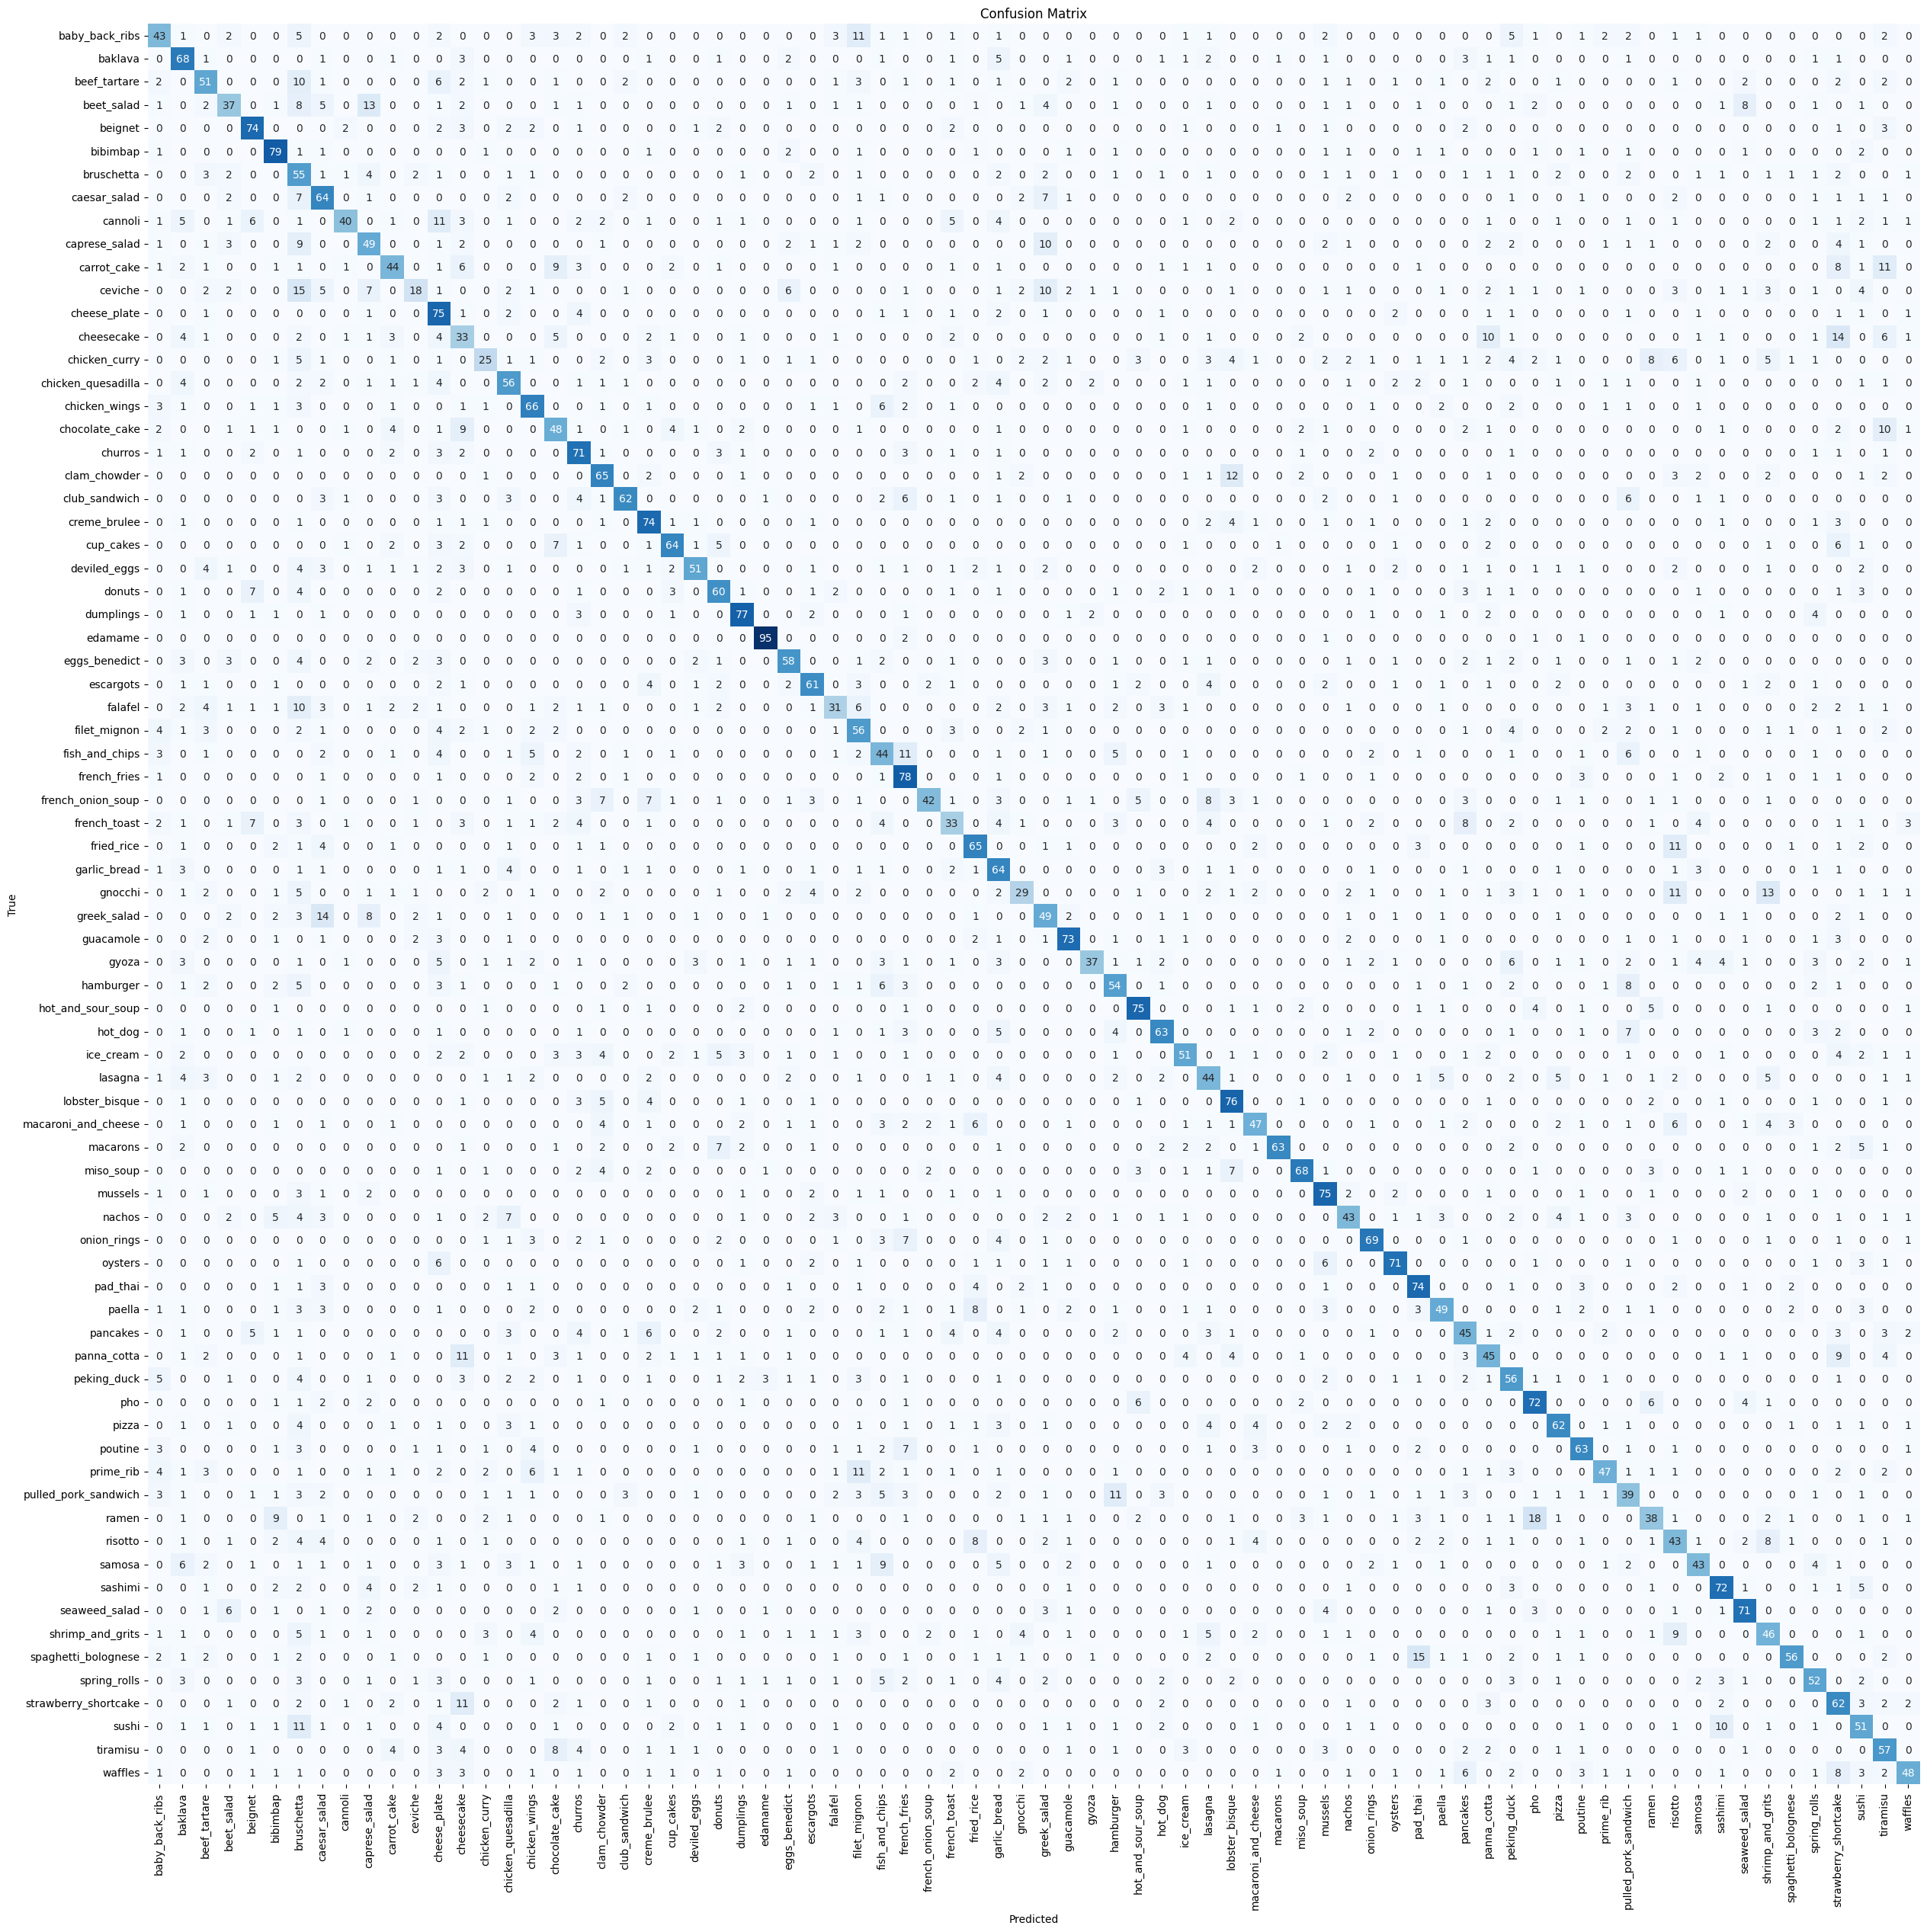

In [6]:
# Menghitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()